# Oscilador de Duffing

$L = \frac{1}{2} m \dot{x}^2 - \frac{1}{2} m \omega_0 ^ 2 x^2 -\frac{1}{3} m \alpha x^3 - \frac{1}{4} m \beta x^4$

$P = m \dot{x}$

$H = m\dot{x}^2 - \frac{1}{2} m \dot{x}^2 + \frac{1}{2} m \omega_0 ^ 2 x^2 +\frac{1}{3} m \alpha x^3 + \frac{1}{4} m \beta x^4$

$ = \frac{1}{2}m \dot{x}^2 + \frac{1}{2} m \omega_0 ^ 2 x^2 +\frac{1}{3} m \alpha x^3 + \frac{1}{4} m \beta x^4$

$ = \frac{P^2}{2m} + \frac{1}{2} m \omega_0 ^ 2 x^2 +\frac{1}{3} m \alpha x^3 + \frac{1}{4} m \beta x^4$

$\dot{x} = \frac{P}{m}$

$\dot{P} = -m\omega_0^2 x - m \alpha x^2 - m\beta x^3$

En principio la dificultad de obtener $P$ y $x$ se encuentra en la solución de las anteriores ecuaciones diferenciales acopladas, es facil ver que reemplazar $P$ en la ecuación de $\dot{P}$ se obtiene una ecuación diferencial de segundo grado para $x$ obtenido la ecuación usada anteriormente en el curso para dicho problema, en el problema se resolverán ambas ecuaciones numéricamente al mismo tiempo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint,simps

In [2]:
b=0.3
g=0.2
m=0.5
#Valores tomados de [1]

CI =[0.5,0] #Condiciones iniciales (X_0,P_0)
t = np.linspace(0,16*np.pi,1001)

def Duffing(a,t):
    return [a[1]*m,-(m*a[0]+m*g*(a[0]**2) + m*b*(a[0]**3))] #[x punto,p punto]

sol= odeint (Duffing,CI,t)

x=sol[:,0]
p=sol[:,1]

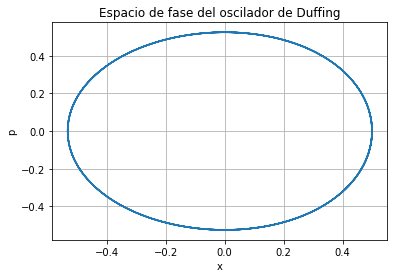

In [3]:
plt.plot(x,p)
plt.title("Espacio de fase del oscilador de Duffing")
plt.xlabel("x")
plt.ylabel("p")
plt.grid()
plt.show()

La solución obtenida se comporta como un oscilador armónico, hay un pequeño corrimiento en x(también en p pero menos observable) del centro de la elipse, de [1] sabemos el comportamiento dinámico del sistema y como se relaciona $x$ con $\ddot{x}$ y que para $x<0.5$ el comportamiento es el de un oscilador armónico y dependiendo del signo de $\alpha , \beta$  cambia punto el punto donde se aleja el oscilador de Duffing de un oscilador armónico, el termino cubico no es un termino simétrico lo cual se observa de la gráficas,  por otro lado para x positivo se observa que se aleja más rápido de un oscilador armónico que para x negativo lo que causa ese cambio del centro de la elipse.

En el dominio usado apenas se ve el efecto de los términos no lineales se tomara como una elipse centrada en el origen y se hallara la variable de acción por dos métodos los cuales serán integrando 4 veces desde el primer termino del camino del espacio de fase hasta llegar a un extremo y suponiendo que es simétrico(elipse) y el otro sera simplemente calculando el área de la elipse.

El hallar la frecuencia se simplifica al no tener una forzarte en el sistema pero al no tener el sistema dimensional se halla(sin unidades)  que el periodo es $\frac{2\pi}{m}$.

Antes de hallar la variable de acción se mostrara gráficamente como se comportan las variables x,p respecto al tiempo.

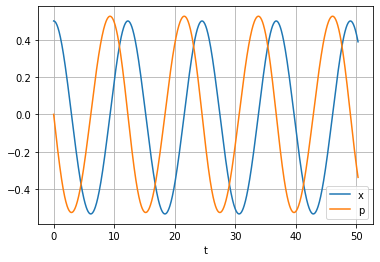

In [4]:
plt.plot(t,x,label=("x"))
plt.plot(t,p,label=("p"))
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()

Se logra ver el comportamiento dinámico de x y p es de un oscilador armónico(como lo esperado ya que apenas se presentan los fenómenos no lineales) y es menos obvio en esa gráfica las variaciones del valor absoluto entre máximos y mínimos lo que justifica mejor el futuro uso de calcular I como el área de una elipse.

Ademas podemos inferir el camino que recorre para la construcción del espacio de fases y por ende se sabe que p va del cero a un mínimo y nuestra integral se puede hacer en un periodo desde $p=0$ hasta $p=p_{min}$.

In [5]:
T=2*np.pi/m

tT=np.where(t==T)[0][0]
P1=p[0:np.where(t==T)[0][0]]
X1=x[0:np.where(t==T)[0][0]]

I=np.pi*abs(np.min(x)) * abs(np.min(p))/(2*np.pi)

P=P1[0:np.where(P1==np.min(P1))[0][0]]
X=X1[0:np.where(P1==np.min(P1))[0][0]]

I1=4*abs(simps(X,P))/(2*np.pi)

print("I_area =",I)
print("I_simpson =",I1)

I_area = 0.1400270464679555
I_simpson = 0.13249702738753838


Como el método de simpson suma sobre todo sobre el eje x hasta el elemento se ve con la necesidad de tomar el valor absoluto de el para que la variable de acción sea positiva (como el área).

El espacio de fase de fase muestra pequeñas oscilaciones alrededor del camino en un periodo por ello se tomaron valores en un periodo para así al hallar el mínimo se halle en el primer recorrido(mínimo loca) y no uno en en otro intervalo de tiempo.

Se ve que en ambos métodos se tiende a un valor cercano de I con una diferencia relativamente pequeña entre ambos puntos.

Ahora se va a observa que pasa en el sistema cuando se varia adibaticamente los parámetros $\alpha$ y $\beta$ 

La condición de adiabaticidad nos dice que $T \frac{d\lambda}{dt} << \lambda$ y ahora el problema es hallar una función tal que los parámetros cumplan con ella

Es hasta fácil ver que si $\alpha$ y $\beta$ son de la forma $A cos(\omega t)$ entonces tenemos que $-A T \omega sin(\omega t) << A cos(\omega t)$

$- T \omega sin(\omega t) <<  cos(\omega t)$

$- T \omega <<  cot(\omega t)$

Si se elige un $\omega$ muy pequeño el valor de la cotangente en un periodo variara poco y va a tender a infinito mientras que $T \omega$ sera un numero muy pequeño y a la vez $-T \omega$ será muy pequeño comparado con $cot(\omega t)$

En un periodo $cos(\omega t)$ para $\omega$ pequeño constante (condición que quise imponer para que el sistema que varia adiabaticamente iniciara de en el mismo valor que el anterior usado) y ahora obtenemos una forma funcional de los parámetro para que varíen adiabaticamente.

Algo similar se podría hacer con una función exponencial decreciente que cumple la condición de adiabaticidad pero se ve menos intuitivo ya que en un periodo se observa un cambio de varios ordenes de magnitud para los parámetros.

In [6]:
t1=np.linspace(0,T,100)
s=10**-2

def Duffing1(a,t,B,G):
    return [a[1]*m,-(m*a[0]+m*(G*np.cos(s*t))*(a[0]**2) + m*(B*np.cos(s*t))*(a[0]**3))]

sol1= odeint (Duffing1,CI,t1,args=(g,b))

x1=sol1[:,0]
p1=sol1[:,1]

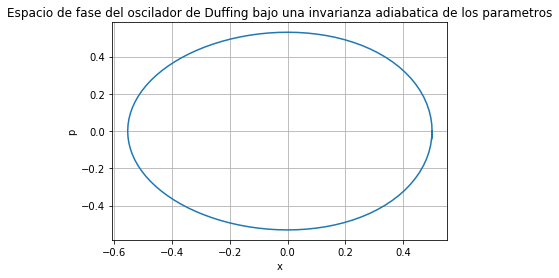

In [7]:
plt.plot(x1,p1)
plt.title("Espacio de fase del oscilador de Duffing bajo una invarianza adiabatica de los parametros")
plt.xlabel("x")
plt.ylabel("p")
plt.grid()
plt.show()

El espacio de fase muestra lo esperado y es un comportamiento casi igual por no decir igual al esperado de cuando no se tenia las variación adiabatica de los parámetros cosa que no ocurre por ejemplo en caso que ambos parámetros sean una función lineal del tiempo que ocurre que la trayectoria en el espacio de fase no sea cerrada en un periodo.

Volviendo a calcular la variable de acción en un para este caso se puede inferir que el cambio sea mínimo al anterior obtenido.

In [8]:
I11=np.pi*abs(np.min(x1)) * abs(np.min(p1))/(2*np.pi)

P1=p1[0:np.where(p1==np.min(p1))[0][0]]
X1=x1[0:np.where(p1==np.min(p1))[0][0]]

I12=4*abs(simps(X1,P1))/(2*np.pi)

print("I_area =",I11)
print("I_simpson =",I12)

I_area = 0.14660181197247205
I_simpson = 0.1338210917094561


In [9]:
abs(I-I11)

0.00657476550451655

In [10]:
abs(I1-I12)

0.0013240643219177284

Se logra observar que el cambio en I es imperceptible gráficamente pero se logra apreciar una vez es calculado y a la vez muestra que el variar los parámetros adiabaticamente si afecta al sistema pero no de forma apreciable.

[1]Efectos no lineales en el entrelazamiento cuántico híbrido en sistemas nanoelectromecánicos, Kalen Yarid Chagollán González , Ensenada, Baja California, México, 2018